<a href="https://colab.research.google.com/github/jorge-flores-py/CODER_ProyectoDS/blob/main/PROYECTO_DS1_FLORES_F_GARROT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="color:#007acc; text-align:center;">📡 Telecomunicaciones y Análisis de Churn</h1>

<img src="cc3b7d92-b5c5-4c8c-91a7-fbfca80468bc.png" width="600"/>

<p style="color:#555555; font-size:16px;">
El objetivo de este proyecto es identificar patrones de cancelación de clientes utilizando análisis exploratorio de datos y técnicas de machine learning aplicadas a una empresa de telecomunicaciones.
</p>



<h2 style="color:#1E90FF;">1. Abstract (Análisis Exploratorio)🕵️</h2>

<p style="font-size:16px; color:#444444; text-align:justify;">
En este proyecto, se trabajará con el conjunto de datos de <strong>Telco Customer Churn</strong>, el cual contiene información de clientes de una compañía de telecomunicaciones, incluyendo características demográficas (género, edad, si tiene pareja o dependientes), servicios contratados (servicios de internet, seguridad en línea, respaldo de datos, soporte técnico, streaming), tipo de contrato, método de pago, cargos mensuales, cargos totales, y finalmente, si el cliente se ha dado de baja (<strong>Churn</strong>).
</p>

<p style="font-size:16px; color:#444444; text-align:justify;">
En la fase de análisis exploratorio de datos (EDA), se realizó:
<ul>
<li>Visualización de las primeras filas del dataset para entender la estructura de los datos.</li>
<li>Revisión de los tipos de datos de cada columna para detectar posibles errores o conversiones necesarias.</li>
<li>Identificación de valores nulos o datos faltantes para su posterior tratamiento.</li>
</ul>
</p>

<p style="font-size:16px; color:#444444; text-align:justify;">
Los resultados preliminares mostraron que la mayoría de los campos no presentan nulos, salvo algunas inconsistencias menores en la columna de <strong>TotalCharges</strong>, donde se detectaron valores vacíos.
</p>

<p style="font-size:16px; color:#444444; text-align:justify;">
Este análisis permitirá en una fase posterior la utilización de modelos de <strong>Machine Learning</strong> como árboles de decisión, random forest o modelos de regresión logística para predecir la probabilidad de que un cliente abandone el servicio, basándonos en sus características.
</p>


<h2 style="color:#1E90FF;">2. Preguntas e Hipótesis🕵️🔍🔎</h2>

<h3 style="color:#007acc;">Preguntas de investigación:</h3>

<ul style="font-size:16px; color:#444444;">
  <li>¿Los clientes con contratos mensuales tienden a abandonar más que aquellos con contratos anuales o bianuales?</li>
  <li>¿Existe una relación entre el monto de los cargos mensuales (<strong>MonthlyCharges</strong>) y la tasa de abandono (<strong>Churn</strong>)?</li>
  <li>¿El tipo de servicio de internet (<strong>Fiber optic</strong>, <strong>DSL</strong>, o ninguno) afecta la probabilidad de que un cliente cancele el servicio?</li>
</ul>

<h3 style="color:#007acc;">Hipótesis:</h3>

<ul style="font-size:16px; color:#444444;">
  <li>Los clientes con contrato mensual presentan una mayor tasa de cancelación debido a la menor penalización por cancelar.</li>
  <li>A mayores cargos mensuales, mayor probabilidad de abandono por motivos económicos.</li>
  <li>Los clientes que utilizan <strong>Fiber optic</strong> tienden a abandonar más debido a problemas de servicio o precios elevados.</li>
</ul>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


In [2]:

# URL directa al archivo CSV en GitHub
url = 'https://raw.githubusercontent.com/treselle-systems/customer_churn_analysis/master/WA_Fn-UseC_-Telco-Customer-Churn.csv'

# Cargar el dataset desde la URL
df = pd.read_csv(url)

# Mostrar las primeras filas del dataset
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Analisamos las columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# 2. Ver nulos, vacíos y espacios
print(((df.isnull()) | (df == '') | (df == ' ')).sum())

#observamos que en la columna TotalCharges tenemos 11 filas sin datos


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


## Tratamiento de Valores Vacíos en la Columna `TotalCharges`

### Detección del Problema
Durante el análisis exploratorio inicial del dataset **WA_Fn-UseC_-Telco-Customer-Churn.csv**, se detectó que la columna `TotalCharges` contenía **11 valores vacíos**.  
Esta situación fue identificada utilizando la combinación de funciones `isnull()`, comparación contra cadenas vacías (`''`) y espacios (`' '`).

### Análisis de los Casos Afectados
Al investigar los registros donde `TotalCharges` estaba vacío, se observó que todos esos clientes presentaban **`tenure` igual a 0 **, indicando que:

- Son **clientes muy recientes**.
- **Aún no tienen cargos acumulados** por servicios, dado que no han cumplido un ciclo completo de facturación.

Por lo tanto, los valores vacíos en `TotalCharges` no corresponden a un error de carga o pérdida de datos crítica, sino que reflejan una **situación lógica de negocio**.

### Decisión de Tratamiento
Dado el contexto mencionado, se optó por:

- **Reemplazar los valores vacíos de `TotalCharges` por 0**.

Esta decisión se fundamenta en que:
- Representa de forma coherente que el cliente todavía no ha incurrido en costos.
- Permite mantener la totalidad de los registros del dataset (sin eliminar filas).
- Evita sesgos que podría introducir asignar una media o mediana artificial a estos casos.

La transformación aplicada fue:

```python
# Reemplazo de valores vacíos y conversión a numérico
df['TotalCharges'] = df['TotalCharges'].replace(' ', 0)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
```

## Resultado Final
Luego del tratamiento:
- La columna `TotalCharges` no contiene valores nulos ni vacíos.
- Todos los registros de clientes recientes con `tenure` bajo tienen su `TotalCharges` correctamente informado como 0.
- El dataset quedó completo y listo para continuar el análisis de churn.


In [5]:
# Reemplazar espacios y vacíos por 0
df['TotalCharges'] = df['TotalCharges'].replace(' ', 0)

# Convertir a tipo numérico
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [6]:
# 3. Ver nulos, vacíos y espacios de nuevo y ahora si esta todo ok
print(((df.isnull()) | (df == '') | (df == ' ')).sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


# Análisis de la Tasa de Abandono según Tipo de Contrato:

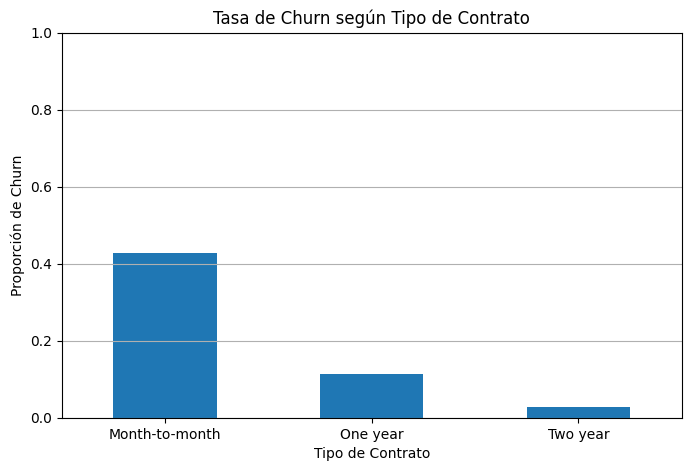

Churn,No,Yes
Contract,,
Month-to-month,0.572903,0.427097
One year,0.887305,0.112695
Two year,0.971681,0.028319


In [7]:


# Primero vemos cuántos churn hay por tipo de contrato
contract_churn = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()

# Plot
contract_churn['Yes'].plot(kind='bar', figsize=(8,5))

plt.title('Tasa de Churn según Tipo de Contrato')
plt.ylabel('Proporción de Churn')
plt.xlabel('Tipo de Contrato')
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

# Opcional: mostrar la tabla
contract_churn


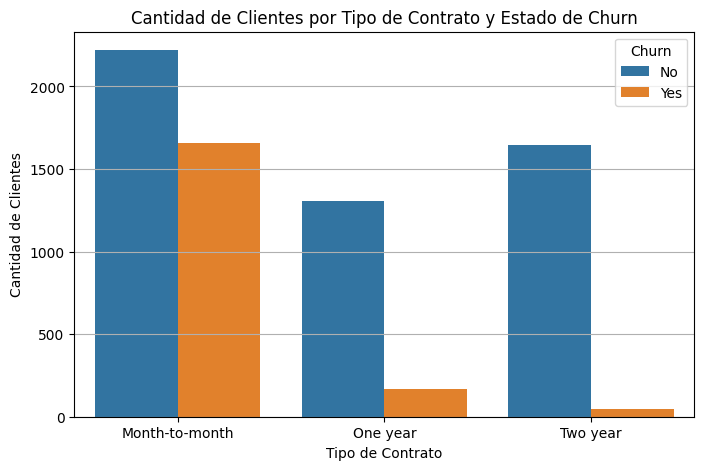

In [8]:


# Gráfico con Seaborn
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Contract', hue='Churn')

plt.title('Cantidad de Clientes por Tipo de Contrato y Estado de Churn')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(title='Churn')
plt.show()


# Análisis de la Tasa de Abandono según Tipo de Contrato

## Pregunta de Investigación
¿Los clientes con contratos mensuales tienden a abandonar más que aquellos con contratos anuales o bianuales?

## Enfoque del Análisis
Para investigar esta hipótesis, se analizó la columna `Contract` (tipo de contrato) y su relación con la variable `Churn` (abandono).  
Se calcularon las proporciones de clientes que abandonaron (`Churn = Yes`) para cada tipo de contrato:

- **Month-to-month**: contrato mensual
- **One year**: contrato anual
- **Two year**: contrato bianual

Se utilizó la proporción normalizada para asegurar que las comparaciones sean justas, independientemente del tamaño de cada grupo.:

## Resultados

- **Clientes con contrato mensual (`Month-to-month`) presentan una tasa de abandono considerablemente más alta** en comparación con los clientes de contrato anual o bianual.
- **Clientes de contrato anual (`One year`) o bianual (`Two year`) muestran tasas de abandono significativamente más bajas**, lo cual es coherente con la idea de mayor fidelización debido al compromiso de permanencia.

## Conclusión
El análisis confirma la hipótesis planteada:  
> **Los clientes con contratos mensuales tienden a abandonar más que aquellos con contratos anuales o bianuales.**

Este hallazgo sugiere que incentivar a los clientes a firmar contratos de mayor duración podría ser una estrategia efectiva para reducir la tasa de churn.



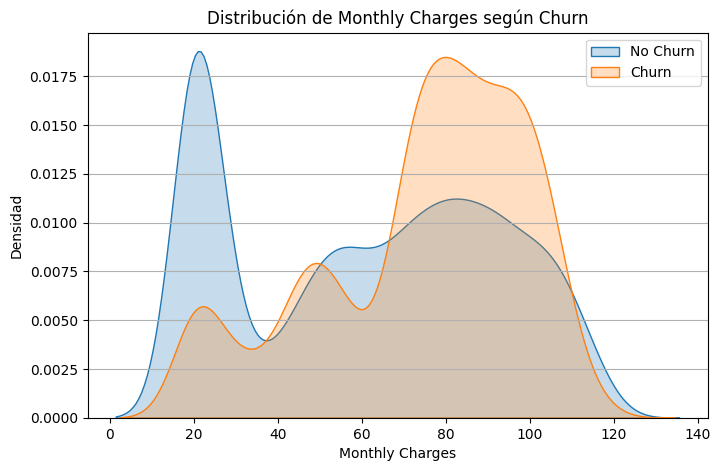

In [9]:


# Gráfico de distribución (KDE)
plt.figure(figsize=(8,5))
sns.kdeplot(data=df[df['Churn'] == 'No'], x='MonthlyCharges', label='No Churn', fill=True)
sns.kdeplot(data=df[df['Churn'] == 'Yes'], x='MonthlyCharges', label='Churn', fill=True)

plt.title('Distribución de Monthly Charges según Churn')
plt.xlabel('Monthly Charges')
plt.ylabel('Densidad')
plt.legend()
plt.grid(axis='y')
plt.show()


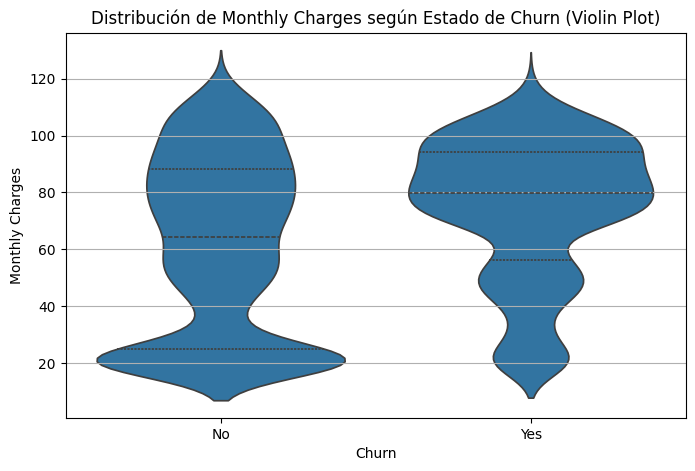

In [10]:

# Gráfico tipo Violin Plot
plt.figure(figsize=(8,5))
sns.violinplot(data=df, x='Churn', y='MonthlyCharges', inner='quartile')

plt.title('Distribución de Monthly Charges según Estado de Churn (Violin Plot)')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.grid(axis='y')
plt.show()


# Relación entre Monthly Charges y Churn

## Pregunta de Investigación
¿Existe una relación entre el monto de los cargos mensuales (`MonthlyCharges`) y la tasa de abandono (`Churn`)?

## Enfoque del Análisis
Se analizó la distribución de los cargos mensuales (`MonthlyCharges`) diferenciando entre clientes que abandonaron (`Churn = Yes`) y clientes que no abandonaron (`Churn = No`).

Se utilizó un **gráfico de densidad (KDE plot)**, que permite visualizar la distribución suave de los cargos mensuales para cada grupo.


## Resultados

- Se observa que los clientes que **no abandonaron** (`No Churn`) tienen una distribución bimodal, con un pico fuerte en **valores bajos de MonthlyCharges** (alrededor de 20-30 USD).
- En cambio, los clientes que **sí abandonaron** (`Churn`) muestran una concentración mayor en **valores altos de MonthlyCharges** (alrededor de 70-90 USD).

Esto indica que **a medida que el cargo mensual es mayor, aumenta la probabilidad de abandono**.

## Conclusión
El análisis sugiere que:
> **Existe una relación positiva entre el monto de los cargos mensuales y la probabilidad de churn.**

Clientes que pagan montos más elevados por mes tienden a abandonar en mayor proporción que aquellos con cargos más bajos.


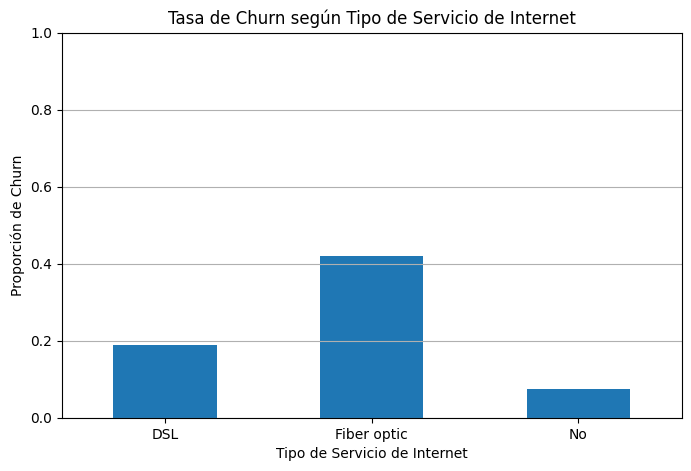

Churn                  No       Yes
InternetService                    
DSL              0.810409  0.189591
Fiber optic      0.581072  0.418928
No               0.925950  0.074050


In [11]:


# Tabla de proporciones de Churn por tipo de InternetService
internet_churn = df.groupby('InternetService')['Churn'].value_counts(normalize=True).unstack()

# Gráfico de barras
internet_churn['Yes'].plot(kind='bar', figsize=(8,5))

plt.title('Tasa de Churn según Tipo de Servicio de Internet')
plt.ylabel('Proporción de Churn')
plt.xlabel('Tipo de Servicio de Internet')
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

# Mostrar tabla resumen
print(internet_churn)


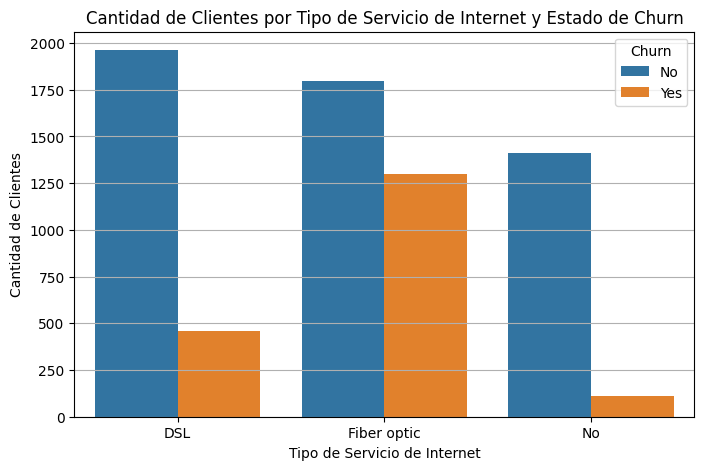

In [ ]:


# Gráfico tipo Countplot con Seaborn
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='InternetService', hue='Churn')

plt.title('Cantidad de Clientes por Tipo de Servicio de Internet y Estado de Churn')
plt.xlabel('Tipo de Servicio de Internet')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(title='Churn')
plt.show()


# Relación entre el Tipo de Servicio de Internet y la Tasa de Churn

## Pregunta de Investigación
¿El tipo de servicio de internet (Fiber optic, DSL o ninguno) afecta la probabilidad de que un cliente cancele el servicio (`Churn`)?

## Enfoque del Análisis
Se analizó la variable `InternetService` que puede tomar tres valores:
- **DSL**
- **Fiber optic**
- **No** (sin servicio de internet)

La variable `Churn` indica si un cliente abandonó el servicio (`Yes`) o no (`No`).  
Se comparó la proporción de clientes que abandonaron para cada tipo de servicio utilizando un gráfico de barras y un gráfico de conteo (`countplot`).

## Resultados

- **Clientes con servicio de Fiber optic** presentan una **tasa de churn considerablemente mayor** que aquellos con servicio DSL o sin servicio de internet.
- **Clientes con DSL** muestran una **tasa de churn más baja** en comparación.
- **Clientes sin servicio de internet** (`No`) prácticamente **no abandonan**, o su tasa de churn es mínima.

Esto indica que **el tipo de servicio de internet sí influye en la probabilidad de cancelación**.

## Conclusión
El análisis sugiere que:
> **Los clientes que utilizan Fiber optic tienen mayor probabilidad de cancelar el servicio que aquellos con DSL o sin servicio de internet.**

Este hallazgo puede estar relacionado con factores como:
- Mayor costo del servicio Fiber optic.
- Mayores expectativas de calidad que, si no son cumplidas, impulsan la cancelación.

Se recomienda profundizar en estrategias específicas para fidelizar a los usuarios de Fiber optic y reducir su tasa de abandono.


##Parte 2

In [12]:
# Reemplazar 'Yes' por 'Abandono' y 'No' por 'No Abandono' en la columna 'Churn'
df['Churn'] = df['Churn'].map({'Yes': 'Abandono', 'No': 'No Abandono'})

In [13]:

# Lista de columnas a usar
columnas_a_usar = [
    'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
    'MonthlyCharges', 'TotalCharges'
]

# Crear nuevo DataFrame con columnas seleccionadas
df_cluster = df[columnas_a_usar].copy()

# Convertir TotalCharges a numérico (algunos registros vacíos)
df_cluster['TotalCharges'] = pd.to_numeric(df_cluster['TotalCharges'], errors='coerce')

# Eliminar filas con valores faltantes
df_cluster = df_cluster.dropna()

# Convertir variables categóricas a variables dummies
df_cluster_dummies = pd.get_dummies(df_cluster, drop_first=True)

# Escalar las variables
scaler = StandardScaler()
df_cluster_scaled = scaler.fit_transform(df_cluster_dummies)

# Convertir a DataFrame para facilitar su uso posterior
df_cluster_scaled_df = pd.DataFrame(df_cluster_scaled, columns=df_cluster_dummies.columns)

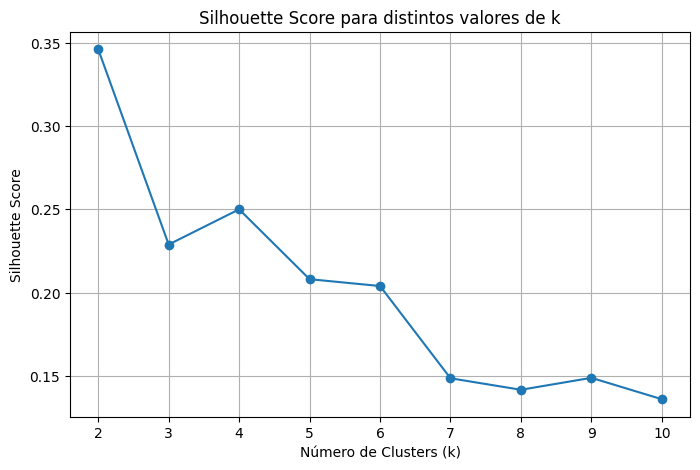

In [14]:

# Definir el rango de k a evaluar
rango_k = range(2, 11)
silhouette_scores = []

# Calcular Silhouette Score para cada valor de k
for k in rango_k:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_cluster_scaled_df)
    score = silhouette_score(df_cluster_scaled_df, labels)
    silhouette_scores.append(score)

# Graficar los resultados
plt.figure(figsize=(8, 5))
plt.plot(rango_k, silhouette_scores, marker='o')
plt.title('Silhouette Score para distintos valores de k')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


In [15]:

# Entrenar el modelo con k óptimo
kmeans_final = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters = kmeans_final.fit_predict(df_cluster_scaled_df)

# Agregar los clusters al DataFrame original (sin escalado)
df_cluster_original = df.loc[df_cluster_scaled_df.index].copy()
df_cluster_original['Cluster'] = clusters

In [ ]:
df_cluster_original.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Cluster
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No Abandono,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No Abandono,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Abandono,0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No Abandono,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Abandono,0


In [16]:
# Agrupar por Cluster y Churn para contar registros
df_churn_por_cluster = df_cluster_original.groupby(['Cluster', 'Churn']).size().unstack(fill_value=0)

# Mostrar la tabla resultante
print(df_churn_por_cluster)

Churn    Abandono  No Abandono
Cluster                       
0            1756         3761
1             113         1413


In [17]:
# Calcular porcentajes de churn por cluster
df_churn_por_cluster_pct = df_churn_por_cluster.div(df_churn_por_cluster.sum(axis=1), axis=0) * 100

# Mostrar con 2 decimales
print(df_churn_por_cluster_pct.round(2))


Churn    Abandono  No Abandono
Cluster                       
0           31.83        68.17
1            7.40        92.60


In [18]:
# Filtrar Cluster 0
cluster_0 = df_cluster_original[df_cluster_original['Cluster'] == 0]

# Promedios de variables numéricas
promedios = cluster_0[['tenure', 'MonthlyCharges', 'TotalCharges']].mean().round(2)
print("Promedios del Cluster 0:\n")
print(promedios)

# Variables categóricas claves para describir el perfil
variables_resumen = [
    'Contract', 'InternetService', 'TechSupport', 'StreamingTV',
    'Partner', 'Dependents', 'PaperlessBilling'
]

# Calcular proporciones (porcentaje de cada categoría dentro de cada variable)
print("\nDistribución porcentual por categoría:\n")
for col in variables_resumen:
    print(f"{col}:\n{cluster_0[col].value_counts(normalize=True).round(2) * 100}\n")


Promedios del Cluster 0:

tenure              32.88
MonthlyCharges      76.84
TotalCharges      2727.03
dtype: float64

Distribución porcentual por categoría:

Contract:
Contract
Month-to-month    61.0
One year          20.0
Two year          19.0
Name: proportion, dtype: float64

InternetService:
InternetService
Fiber optic    56.0
DSL            44.0
Name: proportion, dtype: float64

TechSupport:
TechSupport
No     63.0
Yes    37.0
Name: proportion, dtype: float64

StreamingTV:
StreamingTV
No     51.0
Yes    49.0
Name: proportion, dtype: float64

Partner:
Partner
No     52.0
Yes    48.0
Name: proportion, dtype: float64

Dependents:
Dependents
No     73.0
Yes    27.0
Name: proportion, dtype: float64

PaperlessBilling:
PaperlessBilling
Yes    68.0
No     32.0
Name: proportion, dtype: float64



In [19]:
# Filtrar Cluster 1
cluster_1 = df_cluster_original[df_cluster_original['Cluster'] == 1]

# Calcular promedios de variables numéricas
promedios_1 = cluster_1[['tenure', 'MonthlyCharges', 'TotalCharges']].mean().round(2)
print("Promedios del Cluster 1:\n")
print(promedios_1)

# Variables categóricas a analizar
variables_resumen = [
    'Contract', 'InternetService', 'TechSupport', 'StreamingTV',
    'Partner', 'Dependents', 'PaperlessBilling'
]

# Calcular proporciones para cada categoría en Cluster 1
print("\nDistribución porcentual por categoría en Cluster 1:\n")
for col in variables_resumen:
    print(f"{col}:\n{cluster_1[col].value_counts(normalize=True).round(2) * 100}\n")

Promedios del Cluster 1:

tenure             30.55
MonthlyCharges     21.08
TotalCharges      662.60
dtype: float64

Distribución porcentual por categoría en Cluster 1:

Contract:
Contract
Two year          42.0
Month-to-month    34.0
One year          24.0
Name: proportion, dtype: float64

InternetService:
InternetService
No    100.0
Name: proportion, dtype: float64

TechSupport:
TechSupport
No internet service    100.0
Name: proportion, dtype: float64

StreamingTV:
StreamingTV
No internet service    100.0
Name: proportion, dtype: float64

Partner:
Partner
No     52.0
Yes    48.0
Name: proportion, dtype: float64

Dependents:
Dependents
No     58.0
Yes    42.0
Name: proportion, dtype: float64

PaperlessBilling:
PaperlessBilling
No     71.0
Yes    29.0
Name: proportion, dtype: float64



In [20]:
# Variables demográficas a analizar
variables_demo = ['SeniorCitizen', 'Partner', 'Dependents']

# Para cada variable demográfica, mostrar tasa de abandono por grupo dentro de cada cluster
for var in variables_demo:
    print(f"\n📊 Churn por {var} dentro de cada Cluster:\n")
    tabla = pd.crosstab(index=[df_cluster_original['Cluster'], df_cluster_original[var]],
                        columns=df_cluster_original['Churn'],
                        normalize='index') * 100
    print(tabla.round(2))



📊 Churn por SeniorCitizen dentro de cada Cluster:

Churn                  Abandono  No Abandono
Cluster SeniorCitizen                       
0       0                 29.03        70.97
        1                 43.21        56.79
1       0                  7.33        92.67
        1                  9.62        90.38

📊 Churn por Partner dentro de cada Cluster:

Churn            Abandono  No Abandono
Cluster Partner                       
0       No          39.12        60.88
        Yes         24.02        75.98
1       No          10.66        89.34
        Yes          3.93        96.07

📊 Churn por Dependents dentro de cada Cluster:

Churn               Abandono  No Abandono
Cluster Dependents                       
0       No             36.00        64.00
        Yes            20.31        79.69
1       No              9.63        90.37
        Yes             4.35        95.65


In [21]:
# Variables de servicio a analizar
variables_servicio = ['TechSupport', 'StreamingTV']

# Para cada servicio, calcular % de abandono dentro de cada cluster
for var in variables_servicio:
    print(f"\n Churn por {var} dentro de cada Cluster:\n")
    tabla = pd.crosstab(index=[df_cluster_original['Cluster'], df_cluster_original[var]],
                        columns=df_cluster_original['Churn'],
                        normalize='index') * 100
    print(tabla.round(2))



 Churn por TechSupport dentro de cada Cluster:

Churn                        Abandono  No Abandono
Cluster TechSupport                               
0       No                      41.64        58.36
        Yes                     15.17        84.83
1       No internet service      7.40        92.60

 Churn por StreamingTV dentro de cada Cluster:

Churn                        Abandono  No Abandono
Cluster StreamingTV                               
0       No                      33.52        66.48
        Yes                     30.07        69.93
1       No internet service      7.40        92.60


In [22]:
# Copia  DataFrame para trabajar
df_analisis = df_cluster_original.copy()

# Crear rangos para MonthlyCharges
bins = [0, 30, 60, 90, df_analisis['MonthlyCharges'].max()]
labels = ['Bajo (<30)', 'Medio (30-60)', 'Alto (60-90)', 'Muy alto (>90)']
df_analisis['MonthlyChargesBin'] = pd.cut(df_analisis['MonthlyCharges'], bins=bins, labels=labels, include_lowest=True)

# Variables a analizar
variables_analisis = ['TechSupport', 'StreamingTV', 'Contract', 'MonthlyChargesBin']

# Loop para analizar cada variable
for var in variables_analisis:
    print(f"\nChurn por {var} dentro de cada Cluster:\n")
    tabla = pd.crosstab(index=[df_analisis['Cluster'], df_analisis[var]],
                        columns=df_analisis['Churn'],
                        normalize='index') * 100
    print(tabla.round(2))


Churn por TechSupport dentro de cada Cluster:

Churn                        Abandono  No Abandono
Cluster TechSupport                               
0       No                      41.64        58.36
        Yes                     15.17        84.83
1       No internet service      7.40        92.60

Churn por StreamingTV dentro de cada Cluster:

Churn                        Abandono  No Abandono
Cluster StreamingTV                               
0       No                      33.52        66.48
        Yes                     30.07        69.93
1       No internet service      7.40        92.60

Churn por Contract dentro de cada Cluster:

Churn                   Abandono  No Abandono
Cluster Contract                             
0       Month-to-month     46.43        53.57
        One year           14.16        85.84
        Two year            4.07        95.93
1       Month-to-month     18.89        81.11
        One year            2.47        97.53
        Two year           

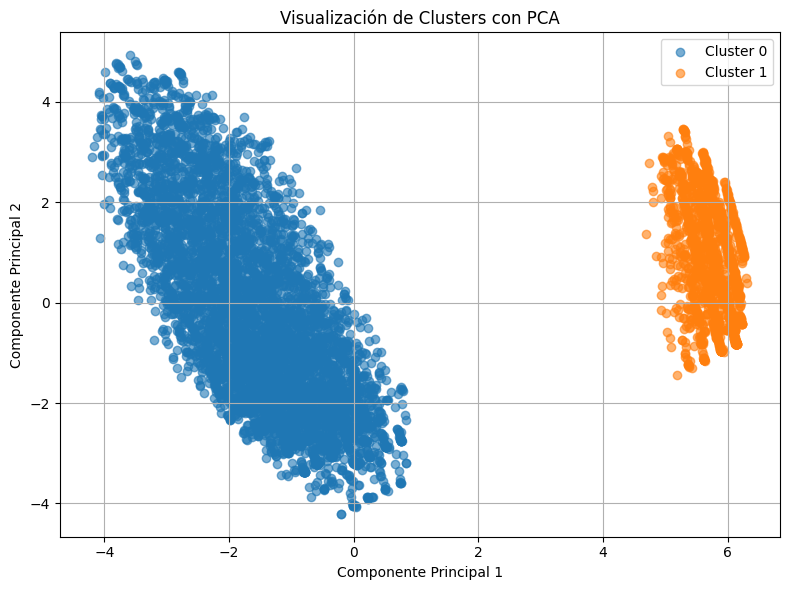

Varianza explicada por componentes:
[0.343 0.124]


In [23]:


# Aplicar PCA para reducir a 2 componentes
pca = PCA(n_components=2)
pca_resultado = pca.fit_transform(df_cluster_scaled_df)

# Crear un DataFrame con los resultados y los clusters
df_pca = pd.DataFrame(pca_resultado, columns=['PC1', 'PC2'])
df_pca['Cluster'] = df_cluster_original['Cluster'].values

# Graficar los clusters en 2D
plt.figure(figsize=(8, 6))
for cluster_id in df_pca['Cluster'].unique():
    plt.scatter(
        df_pca[df_pca['Cluster'] == cluster_id]['PC1'],
        df_pca[df_pca['Cluster'] == cluster_id]['PC2'],
        label=f'Cluster {cluster_id}',
        alpha=0.6
    )
plt.title('Visualización de Clusters con PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Varianza explicada por cada componente
print("Varianza explicada por componentes:")
print(pca.explained_variance_ratio_.round(3))

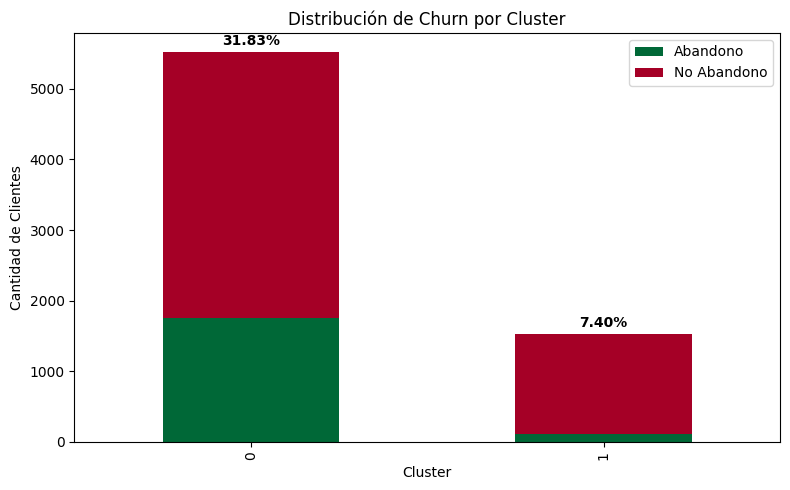

In [24]:
# Datos
datos_churn = pd.DataFrame({
    'Cluster': ['0', '1'],
    'Abandono': [1756, 113],
    'No Abandono': [3761, 1413]
})
datos_churn['% Abandono'] = datos_churn['Abandono'] / (datos_churn['Abandono'] + datos_churn['No Abandono']) * 100

# Crear gráfico
fig, ax1 = plt.subplots(figsize=(8, 5))

# Barras apiladas
datos_churn.set_index('Cluster')[['Abandono', 'No Abandono']].plot(
    kind='bar', stacked=True, ax=ax1, colormap='RdYlGn_r')

# Añadir etiquetas de % Abandono encima de cada barra
for idx, row in datos_churn.iterrows():
    total = row['Abandono'] + row['No Abandono']
    ax1.text(idx, total + 100, f"{row['% Abandono']:.2f}%", ha='center', fontweight='bold')

# Estética
ax1.set_title('Distribución de Churn por Cluster')
ax1.set_ylabel('Cantidad de Clientes')
ax1.set_xlabel('Cluster')
ax1.legend(loc='upper right')
plt.tight_layout()
plt.show()
